In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
file = 'consumption'
area = 'DK2'
fileName = file + "_" + area

file_uppercase = 'Consumption prognosis'
file_lowercase = 'consumption prognosis'

#config
save_plots = True

data = pd.read_csv("../../../data/data_sanitized/"+fileName+".csv") 
data['date']= pd.to_datetime(data['date'],format='%Y-%m-%d')
str_week_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ylabel = file_uppercase+' [MWh]'
ylabelTWh = file_uppercase+' [TWh]'

title = {}
title['avg_consumption_each_year'] = 'Average '+file_lowercase+' for each hour for years 2016-2020 (' + area + ")"
title['total_consumption_2019'] = 'Total '+file_lowercase+' per day for 2019 (' + area + ")"
title['total_consumption_2016_2019'] = 'Total '+file_lowercase+' for years 2016-2019 (' + area + ")"
title['median_per_dayofweek'] = 'Median '+file_lowercase+' for years 2016-2020 (' + area + ")"
title['std_per_dayofweek'] = 'Standard deviation of '+file_lowercase+' for years 2016-2020 (' + area + ")"
global_title = 'Average '+file_lowercase+' for years 2016-2020 (' + area + ")"

data['dayofweek'] = data['date'].dt.dayofweek
data['year'] = data['date'].dt.year
data['dayofyear'] = data['date'].dt.dayofyear


data

,date,holiday,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,dayofweek,year,dayofyear
0,2016-01-01,1,1341.0,1288.0,1232.0,1169.0,1141.0,1144.0,1175.0,1202.0,...,1800.0,1788.0,1703.0,1593.0,1501.0,1411.0,1314.0,4,2016,1
1,2016-01-02,0,1215.0,1155.0,1120.0,1113.0,1124.0,1160.0,1239.0,1350.0,...,2070.0,2052.0,1910.0,1777.0,1668.0,1591.0,1462.0,5,2016,2
2,2016-01-03,1,1388.0,1315.0,1259.0,1210.0,1249.0,1270.0,1329.0,1400.0,...,1923.0,1937.0,1867.0,1753.0,1706.0,1557.0,1431.0,6,2016,3
3,2016-01-04,0,1347.0,1294.0,1255.0,1251.0,1282.0,1399.0,1636.0,1944.0,...,2338.0,2274.0,2102.0,1949.0,1809.0,1639.0,1495.0,0,2016,4
4,2016-01-05,0,1385.0,1326.0,1292.0,1298.0,1340.0,1435.0,1708.0,2005.0,...,2233.0,2219.0,2130.0,2010.0,1876.0,1706.0,1539.0,1,2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2020-05-08,1,1135.0,1082.0,1059.0,1059.0,1051.0,1041.0,1103.0,1213.0,...,1386.0,1434.0,1373.0,1330.0,1293.0,1243.0,1165.0,4,2020,129
1590,2020-05-09,0,1104.0,1055.0,1025.0,1009.0,1004.0,989.0,1034.0,1129.0,...,1385.0,1434.0,1372.0,1320.0,1284.0,1236.0,1158.0,5,2020,130
1591,2020-05-10,1,1102.0,1044.0,1018.0,1003.0,993.0,972.0,1013.0,1100.0,...,1491.0,1541.0,1457.0,1401.0,1350.0,1280.0,1188.0,6,2020,131
1592,2020-05-11,0,1097.0,1045.0,1033.0,1033.0,1049.0,1100.0,1259.0,1492.0,...,1642.0,1626.0,1539.0,1457.0,1412.0,1346.0,1241.0,0,2020,132


In [3]:
def savePlot(name):
    if(save_plots):
            fileName = '../plots/'+ name + '_' + area
        plt.savefig(fileName, bbox_inches='tight')

In [4]:
def draw_plot_hour(data_serie):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    # for column in columns:
    ax.plot(data_serie)
    # set title and legend
    ax.set_title('Plot')
    ax.legend()
    
def draw_plot_hour_for_year(data_frame, name='Plot', ylabel = 'y ax'):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for index, row in data_frame.iterrows():
        ax.plot(data_frame.loc[index], label=data_frame.loc[index].name)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 20})
    ax.set_xlabel('Hour')
    ax.set_ylabel(ylabel)
    
def draw_two_plots_hour_for_year(data_frame, name=['Plot','Plot'], ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(nrows=2)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for holiday, new_df in data_frame.groupby(level=0):
        for index, row in new_df.iterrows():
            ax[index[0]].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[index[0]].set_title(name[index[0]])
            # set title and legend
            ax[index[0]].legend(prop={'size': 15})
            ax[index[0]].set_xlabel('Hour')
            ax[index[0]].set_ylabel(ylabel)

def draw_7_plots_hour_for_year(data_frame, name='Plot', ylabel = 'y lab', global_title=global_title):
    x_data = range(0, 24)
    # create figure and axis
    fig, ax = plt.subplots(4, 2,sharey=True)
    fig.delaxes(ax[3,1])
    fig.set_figheight(14)
    fig.set_figwidth(20)
    fig.subplots_adjust(hspace=0.3)
    st = fig.suptitle(global_title, fontsize="x-large")
    st.set_y(0.95)
    
    data_frame = data_frame.reindex(index=data_frame.index[::-1])
    for workday, new_df in data_frame.groupby(level=0):
        plot_index = int(workday/2),int(workday%2)
        for index, row in new_df.iterrows():
            ax[plot_index].plot(new_df.loc[index], label=new_df.loc[index].name[1])
            ax[int(index[0]/2),int(index[0]%2)].set_title(name[index[0]])
            # set title and legend
            ax[plot_index].legend(prop={'size': 9})
            ax[plot_index].set_xlabel('Hour')
            ax[plot_index].set_ylabel(ylabel)
            ax[plot_index].yaxis.set_tick_params(labelleft=True)
            
def draw_plot_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    for year, new_df in data_frame.groupby(level=0):
        ax.plot(data_frame.loc[year], label=year)
    # set title and legend
    ax.set_title(name)
    ax.legend(prop={'size': 15})
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
            
def draw_simple_barplot_for_years(data_frame, name='Plot', ylabel = ylabel):
    fig, ax = plt.subplots()
    min_val = min(data_frame.iloc[:,0])
    max_val = max(data_frame.iloc[:,0])
    margin = (max_val - min_val)*3/10
    plt.ylim([min_val - margin,max_val + margin])
    ax.bar(data_frame.index,data_frame.iloc[:,0])
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(name)
    ax.set_xticks(data_frame.index)
    
def draw_plot_single_dayofyear(data_frame, name='Plot', ylabel = ylabel):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    # plot each column
    ax.plot(data_frame, label=data_frame.index)
    # set title and legend
    ax.set_title(name)
    ax.set_xlabel('Day of year')
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks()[::14])

In [5]:
data_avg_by_year = data
data_avg_by_year['year']= data_avg_by_year['date'].dt.year
data_avg_by_year = data_avg_by_year.drop(columns=['holiday','date','dayofyear','dayofweek'])
data_avg_by_year = data_avg_by_year.groupby('year').mean()
data_avg_by_year

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
year,,,,,,,,,,,,,,,,,,,,,
2016,1189.147541,1130.811475,1102.427596,1100.221311,1112.234973,1174.997268,1337.439891,1523.010929,1629.644809,1686.500000,...,1674.262295,1650.896175,1681.489071,1785.685792,1779.579235,1689.986339,1593.937158,1508.491803,1398.773224,1279.158470
2017,1175.000000,1117.421918,1090.767123,1088.849315,1101.419178,1163.301370,1331.402740,1517.720548,1624.109589,1684.816438,...,1664.378082,1643.079452,1674.978082,1784.304110,1777.142466,1686.873973,1590.405479,1500.005479,1387.536986,1265.849315
2018,1213.112329,1157.246575,1130.557534,1127.939726,1138.084932,1200.342466,1365.827397,1547.169863,1652.178082,1708.200000,...,1691.257534,1672.920548,1706.504110,1807.920548,1798.536986,1707.378082,1612.358904,1522.652055,1414.153425,1299.320548
2019,1202.753425,1149.841096,1125.053425,1122.731507,1134.953425,1195.323288,1355.879452,1533.926027,1637.936986,1694.706849,...,1674.854795,1656.463014,1688.197260,1790.189041,1778.991781,1688.679452,1591.279452,1502.673973,1394.989041,1285.545205
2020,1267.443609,1216.203008,1190.992481,1189.684211,1202.548872,1262.759398,1405.932331,1569.774436,1668.872180,1714.819549,...,1679.210526,1657.300752,1691.774436,1829.037594,1848.684211,1746.879699,1645.233083,1553.015038,1443.285714,1335.872180


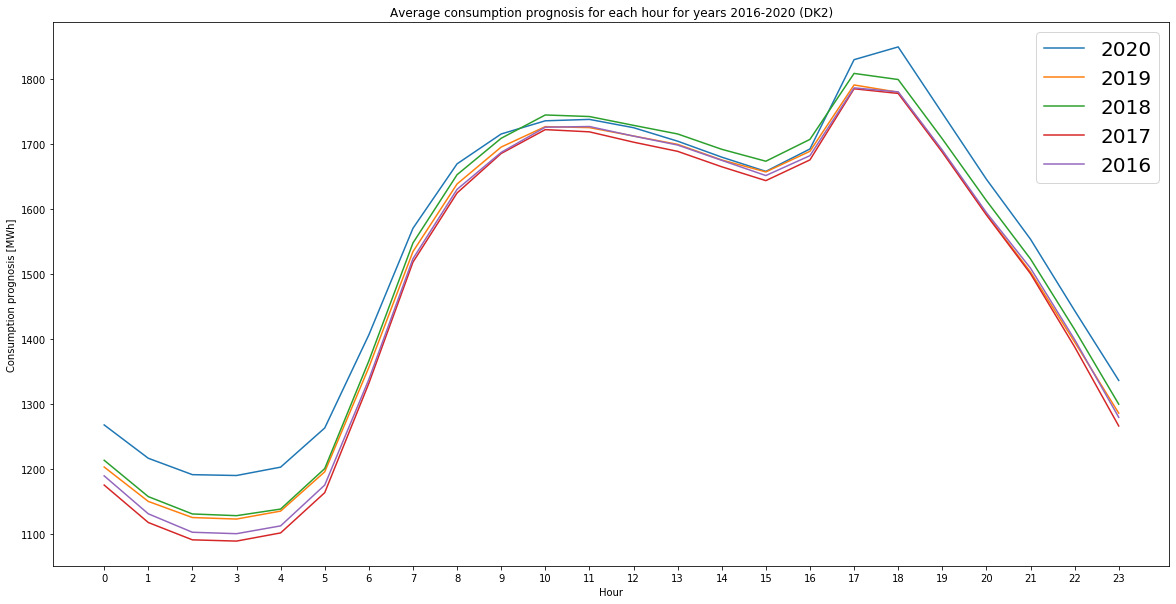

In [6]:
draw_plot_hour_for_year(data_avg_by_year, title['avg_consumption_each_year'], ylabel)
savePlot('avg_hour')

In [7]:
data_avg_by_year_per_holiday = data.copy()
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.drop(columns=['date','dayofyear','dayofweek'])
data_avg_by_year_per_holiday = data_avg_by_year_per_holiday.groupby(['holiday','year']).mean()
data_avg_by_year_per_holiday

0            1            2            3            4  \
holiday year                                                                    
0       2016  1189.032787  1131.321311  1104.200000  1104.931148  1120.367213   
        2017  1174.092105  1116.881579  1092.250000  1092.404605  1108.470395   
        2018  1208.966887  1153.761589  1128.963576  1128.241722  1142.238411   
        2019  1203.326733  1150.445545  1128.066007  1127.960396  1144.422442   
        2020  1272.458716  1221.091743  1197.082569  1198.504587  1213.770642   
1       2016  1189.721311  1128.262295  1093.565574  1076.672131  1071.573770   
        2017  1179.524590  1120.114754  1083.377049  1071.131148  1066.278689   
        2018  1232.984127  1173.952381  1138.198413  1126.492063  1118.174603   
        2019  1199.951613  1146.887097  1110.330645  1097.177419  1088.677419   
        2020  1244.666667  1194.000000  1163.333333  1149.625000  1151.583333   

                        5            6            7            8            9  \
holiday year                                                                    
0       2016  1193.432787  1378.160656  1581.973770  1685.193443  1733.262295   
        2017  1181.092105  1373.707237  1579.282895  1681.851974  1733.684211   
        2018  1215.195364  1404.725166  1604.086093  1705.831126  1752.910596   
        2019  1214.960396  1398.085809  1593.343234  1693.551155  1741.544554   
        2020  1284.155963  1450.146789  1630.844037  1726.633028  1761.146789   
1       2016  1082.819672  1133.836066  1228.196721  1351.901639  1452.688525   
        2017  1074.639344  1120.573770  1210.918033  1336.344262  1441.278689   
        2018  1129.142857  1179.365079  1274.333333  1394.984127  1493.873016   
        2019  1099.354839  1149.612903  1243.548387  1366.145161  1465.806452   
        2020  1165.583333  1205.125000  1292.416667  1406.541667  1504.416667   

              ...           14           15           16           17  \
holiday year  ...                                                       
0       2016  ...  1709.472131  1681.727869  1708.222951  1809.885246   
        2017  ...  1699.049342  1674.486842  1703.292763  1811.927632   
        2018  ...  1723.927152  1702.112583  1732.185430  1830.791391   
        2019  ...  1709.108911  1687.475248  1715.419142  1814.584158   
        2020  ...  1713.458716  1688.155963  1721.018349  1856.201835   
1       2016  ...  1498.213115  1496.737705  1547.819672  1664.688525   
        2017  ...  1491.590164  1486.557377  1533.868852  1646.639344   
        2018  ...  1534.650794  1532.984127  1583.396825  1698.285714   
        2019  ...  1507.451613  1504.903226  1555.161290  1670.967742   
        2020  ...  1523.666667  1517.166667  1558.958333  1705.666667   

                       18           19           20           21           22  \
holiday year                                                                    
0       2016  1798.750820  1706.367213  1608.288525  1520.750820  1410.081967   
        2017  1800.805921  1707.009868  1606.444079  1513.404605  1398.588816   
        2018  1817.241722  1721.824503  1623.288079  1531.612583  1421.589404   
        2019  1799.501650  1706.376238  1605.722772  1515.316832  1405.798680   
        2020  1872.211009  1766.302752  1660.917431  1566.339450  1454.100917   
1       2016  1683.721311  1608.081967  1522.180328  1447.196721  1342.229508   
        2017  1659.213115  1586.524590  1510.475410  1433.229508  1332.459016   
        2018  1708.873016  1638.126984  1559.968254  1479.698413  1378.507937   
        2019  1678.758065  1602.193548  1520.693548  1440.887097  1342.161290   
        2020  1741.833333  1658.666667  1574.000000  1492.500000  1394.166667   

                       23  
holiday year               
0       2016  1287.098361  
        2017  1274.444079  
        2018  1304.619205  
        2019  1294.323432  
        2020  1344.568807  
1       2016  1239.459016  
    

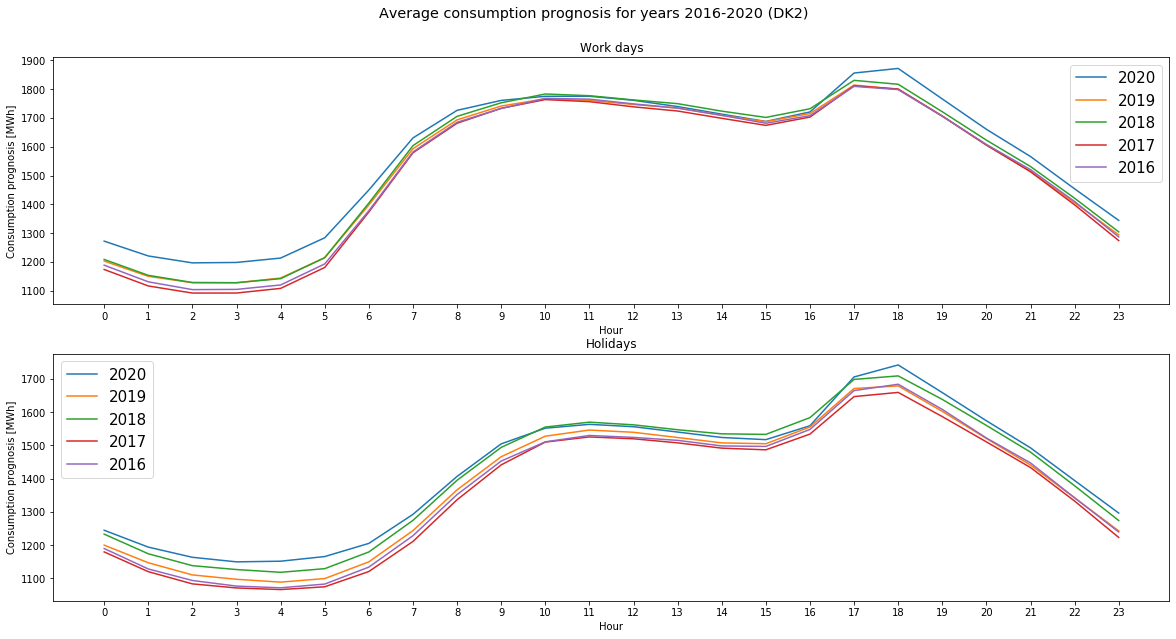

In [8]:
draw_two_plots_hour_for_year(data_avg_by_year_per_holiday, ['Work days','Holidays'], ylabel)
savePlot('avg_workday_holiday')

In [9]:
data_avg_by_year_per_dayofweek = data.copy()
df = data_avg_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_avg_by_year_per_dayofweek = df
data_avg_by_year_per_dayofweek

0            1            2            3  \
dayofweek year                                                       
0         2016  1149.591837  1099.959184  1077.244898  1080.530612   
          2017  1127.183673  1075.428571  1056.632653  1064.224490   
          2018  1172.489796  1122.775510  1099.877551  1104.653061   
          2019  1165.666667  1115.647059  1097.431373  1103.333333   
          2020  1255.611111  1203.944444  1184.722222  1182.722222   
1         2016  1186.423077  1131.692308  1105.634615  1109.557692   
          2017  1172.784314  1116.862745  1095.529412  1094.529412   
          2018  1210.240000  1157.900000  1134.560000  1136.900000   
          2019  1201.411765  1151.274510  1131.176471  1135.333333   
          2020  1253.578947  1208.000000  1183.947368  1194.000000   
2         2016  1194.423077  1138.865385  1112.288462  1113.288462   
          2017  1176.769231  1120.538462  1097.230769  1101.346154   
          2018  1211.352941  1158.333333  1136.078431  1137.823529   
          2019  1207.720000  1155.540000  1137.900000  1138.060000   
          2020  1269.500000  1217.833333  1201.111111  1205.166667   
3         2016  1200.340000  1139.920000  1115.000000  1119.640000   
          2017  1191.140000  1133.820000  1110.900000  1112.600000   
          2018  1214.160000  1157.240000  1134.740000  1134.920000   
          2019  1207.551020  1151.469388  1130.673469  1131.000000   
          2020  1287.833333  1236.666667  1212.666667  1215.388889   
4         2016  1196.520000  1134.620000  1108.020000  1111.260000   
          2017  1179.120000  1122.800000  1096.920000  1096.460000   
          2018  1224.600000  1167.160000  1141.920000  1139.980000   
          2019  1214.980000  1160.900000  1137.100000  1138.320000   
          2020  1301.117647  1246.705882  1220.352941  1224.058824   
5         2016  1205.346154  1141.519231  1106.019231  1094.711538   
          2017  1195.673077  1130.326923  1095.192308  1084.615385   
          2018  1219.750000  1158.269231  1126.000000  1115.038462   
          2019  1222.730769  1167.846154  1134.461538  1122.346154   
          2020  1269.894737  1215.842105  1182.526316  1172.789474   
6         2016  1186.480769  1125.326923  1089.990385  1073.788462   
          2017  1180.886792  1120.528302  1085.264151  1071.207547   
          2018  1216.923077  1158.019231  1123.798077  1112.403846   
          2019  1202.596154  1149.750000  1113.701923  1101.153846   
          2020  1260.473684  1210.684211  1177.631579  1163.052632   

                          4            5            6            7  \
dayofweek year                                                       
0         2016  1105.612245  1192.591837  1410.673469  1640.265306   
          2017  1086.387755  1172.142857  1394.163265  1625.591837   
          2018  1124.122449  1209.693878  1429.081633  1650.489796   
          2019  1126.647059  1208.450980  1417.960784  1630.823529   
          2020  1199.166667  1282.833333  1478.055556  1681.222222   
1         2016  1131.461538  1218.096154  1426.019231  1648.384615   
          2017  1115.176471  1199.725490  1422.450980  1644.764706   
          2018  1155.940000  1235.940000  1455.840000  1675.200000   
          2019  1154.784314  1238.960784  1448.627451  1662.490196   
          2020  1211.315789  1291.052632  1478.526316  1681.263158   
2         2016  1132.826923  1216.634615  1431.230769  1653.173077   
          2017  1119.288462  1208.211538  1432.134615  1657.730769   
          2018  1158.980392  1248.862745  1464.862745  1682.156863   
          2019  1158.000000  1240.640000  1447.680000  1663.320000   
          2020  1225.722222  1309.277778  1498.055556  1693.222222   
3         2016  1133.020000  1218.380000  1430.220000  1654.740000   
          2017  1133.420000  1216.300000  1435.180000  1662.380000   
          2018  1152.160000  1239.600000  1456.400000  1674.360000   
          2019  1150.510204  1236.6

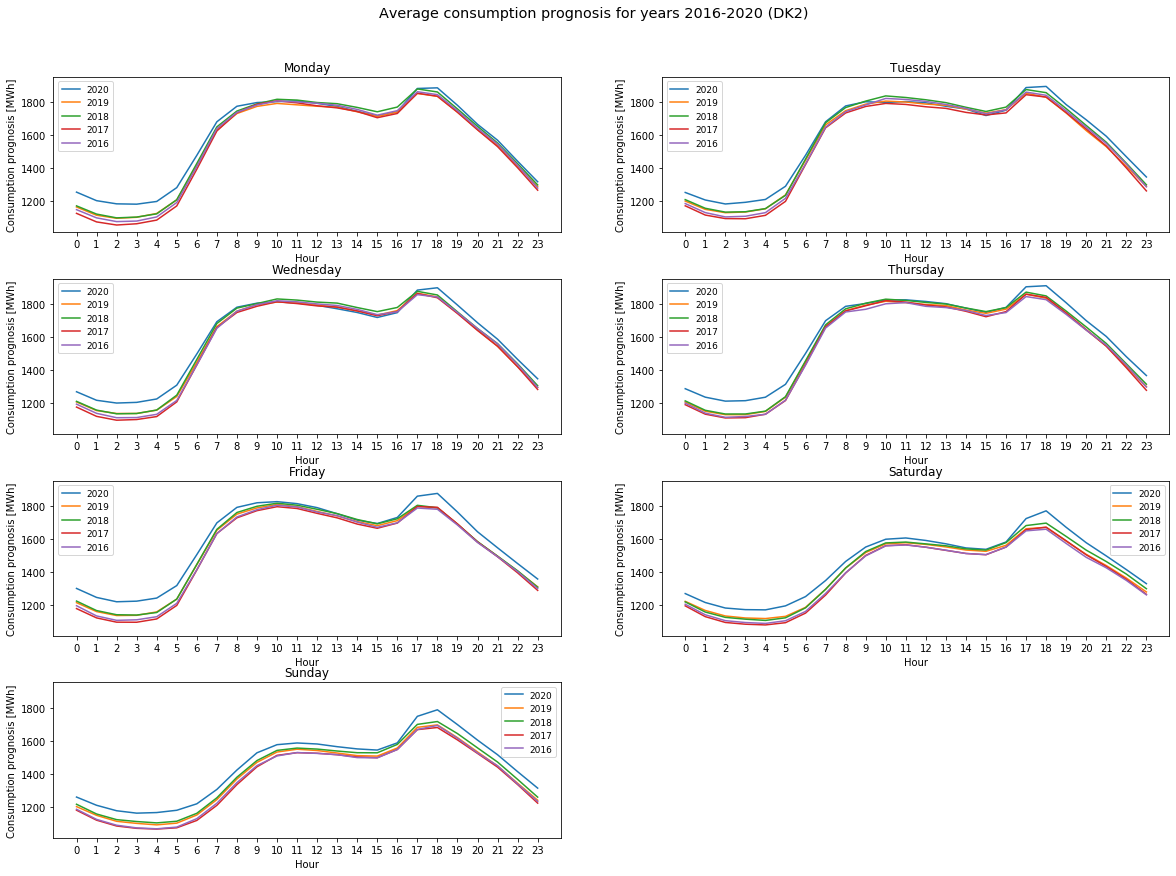

In [10]:
draw_7_plots_hour_for_year(data_avg_by_year_per_dayofweek, str_week_list, ylabel)
savePlot('avg_dayofweek')

In [11]:
data_std_by_year_per_dayofweek = data.copy()
df = data_std_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).std()
data_std_by_year_per_dayofweek = df
data_std_by_year_per_dayofweek

0           1           2           3           4  \
dayofweek year                                                               
0         2016  104.860804  103.622705  100.590451  106.559667  116.415351   
          2017  110.681162  113.148133  112.742090  119.722642  132.617058   
          2018  143.724726  144.620230  146.304710  150.562632  158.590226   
          2019  104.572590  102.743141  105.529381  111.390424  120.759898   
          2020   77.784120   77.390889   77.962891   76.752318   72.282330   
1         2016  106.262779  105.539610  106.530126  108.736669  116.492609   
          2017  121.587057  120.369601  120.705485  124.058108  134.694574   
          2018  137.078342  137.859771  137.317918  140.951034  147.893703   
          2019  103.012267  103.764749  104.024171  111.883094  121.312541   
          2020   70.373855   76.299847   74.709418   76.352254   76.942296   
2         2016  105.986745  104.841062  104.513126  111.651829  122.610770   
          2017  114.340670  114.147902  113.693536  120.517655  132.316812   
          2018  138.777927  138.537889  141.762314  145.892797  155.278136   
          2019  104.121405  104.595667  104.424419  108.516228  118.693397   
          2020   74.220062   69.296677   69.124686   67.969933   78.901134   
3         2016  107.183727  108.779845  110.465619  111.838032  120.660172   
          2017  124.955177  127.703849  127.187673  129.908602  140.240477   
          2018  140.705708  140.494834  140.469157  142.327710  150.234288   
          2019  102.789036  101.969788  104.587162  106.878631  114.969221   
          2020   68.287670   66.639504   74.355268   72.877931   79.056363   
4         2016  106.466099  106.032126  106.611346  107.034576  115.483440   
          2017  126.461520  123.852447  122.557415  124.922051  133.244610   
          2018  144.097473  146.011232  145.432057  148.973288  159.887232   
          2019  108.213223  108.766601  109.533752  113.265525  122.511555   
          2020   70.522942   68.571828   67.863780   66.496683   74.604595   
5         2016  117.276761  112.723763  110.831349  113.252855  121.962528   
          2017  136.923869  132.598276  130.265797  131.467756  137.862090   
          2018  150.736867  148.814151  148.248731  152.329746  159.714876   
          2019  122.735187  122.254217  121.019276  122.241786  130.033484   
          2020   87.558802   79.815247   84.406667   83.801736   80.156244   
6         2016  118.402353  116.093222  111.936278  112.927417  120.273689   
          2017  138.656141  135.894841  136.563475  136.976747  146.420055   
          2018  155.570279  158.935489  157.146998  160.385841  163.530372   
          2019  116.931564  115.858919  115.401229  113.043872  121.323376   
          2020   86.722013   89.514153   86.628973   82.925317   86.145260   

                         5           6           7           8           9  \
dayofweek year                                                               
0         2016  134.510675  169.575989  199.756599  186.201230  173.731249   
          2017  150.654821  179.005045  197.740878  179.044687  168.893385   
          2018  171.971437  198.416737  220.770348  204.527049  189.977203   
          2019  137.261402  168.971354  190.547601  173.848787  160.004583   
          2020   87.277954  135.933146  147.445526  133.904219  133.188598   
1         2016  139.607891  169.450611  191.910228  178.011248  169.762520   
          2017  152.939475  182.352331  202.367348  195.375108  177.811182   
          2018  162.810571  191.660985  210.531688  200.023060  191.725664   
          2019  137.537335  166.450949  190.845945  176.800395  159.781456   
          2020   93.206148  140.583849  164.988499  153.143895  156.193369   
2         2016  136.695888  166.571967  193.619267  173.209274  153.394024   
          2017  151.330742  175.178791  191.714055  174.308489  159.297766   
          2018  171.272067  193.804336  208.39

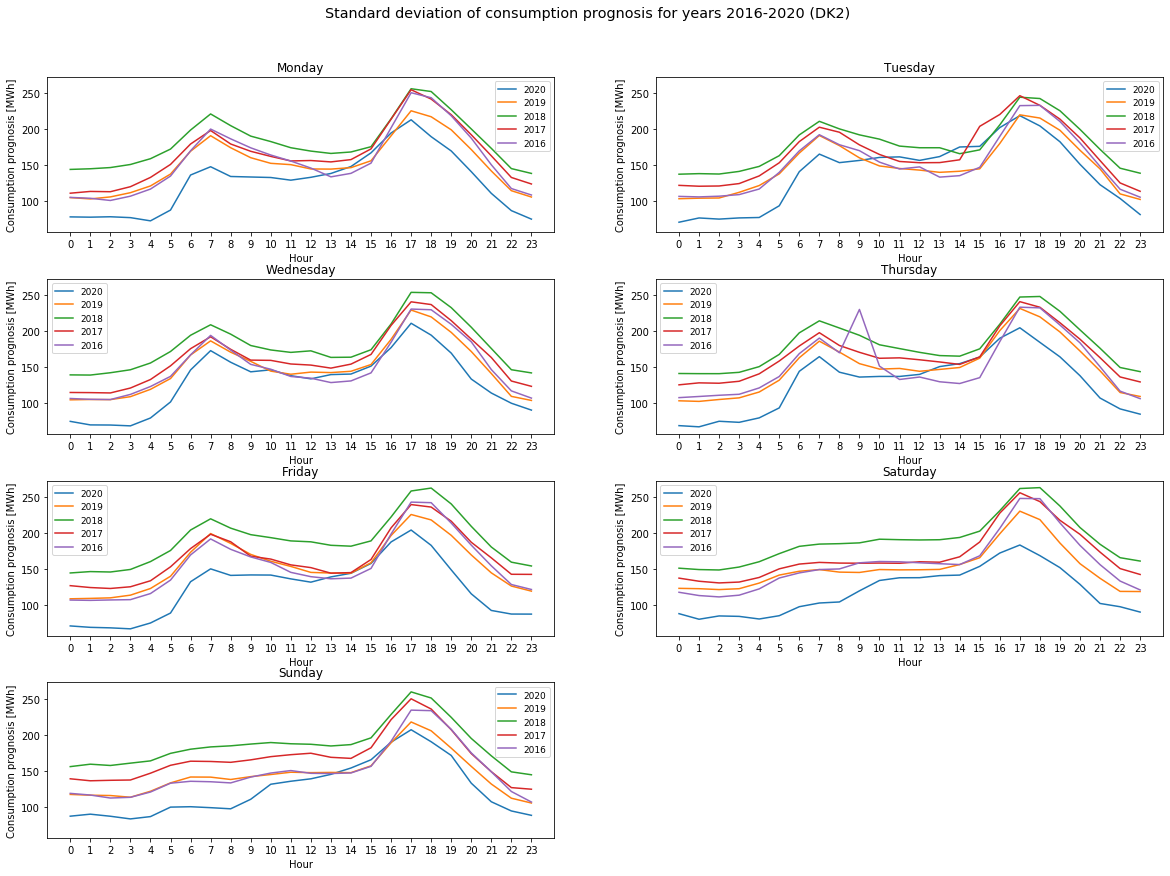

In [12]:
draw_7_plots_hour_for_year(data_std_by_year_per_dayofweek, str_week_list, ylabel, title['std_per_dayofweek'])
savePlot('std_dayofweek')

In [13]:
data_median_by_year_per_dayofweek = data.copy()
df = data_median_by_year_per_dayofweek
df = df.loc[(df['dayofweek'] == 6) | ((df['dayofweek'] != 6) & (df['holiday'] == 0))]
df = df.drop(columns=['holiday','date','dayofyear'])
df = df.groupby(['dayofweek','year']).mean()
data_median_by_year_per_dayofweek = df
data_median_by_year_per_dayofweek

0            1            2            3  \
dayofweek year                                                       
0         2016  1149.591837  1099.959184  1077.244898  1080.530612   
          2017  1127.183673  1075.428571  1056.632653  1064.224490   
          2018  1172.489796  1122.775510  1099.877551  1104.653061   
          2019  1165.666667  1115.647059  1097.431373  1103.333333   
          2020  1255.611111  1203.944444  1184.722222  1182.722222   
1         2016  1186.423077  1131.692308  1105.634615  1109.557692   
          2017  1172.784314  1116.862745  1095.529412  1094.529412   
          2018  1210.240000  1157.900000  1134.560000  1136.900000   
          2019  1201.411765  1151.274510  1131.176471  1135.333333   
          2020  1253.578947  1208.000000  1183.947368  1194.000000   
2         2016  1194.423077  1138.865385  1112.288462  1113.288462   
          2017  1176.769231  1120.538462  1097.230769  1101.346154   
          2018  1211.352941  1158.333333  1136.078431  1137.823529   
          2019  1207.720000  1155.540000  1137.900000  1138.060000   
          2020  1269.500000  1217.833333  1201.111111  1205.166667   
3         2016  1200.340000  1139.920000  1115.000000  1119.640000   
          2017  1191.140000  1133.820000  1110.900000  1112.600000   
          2018  1214.160000  1157.240000  1134.740000  1134.920000   
          2019  1207.551020  1151.469388  1130.673469  1131.000000   
          2020  1287.833333  1236.666667  1212.666667  1215.388889   
4         2016  1196.520000  1134.620000  1108.020000  1111.260000   
          2017  1179.120000  1122.800000  1096.920000  1096.460000   
          2018  1224.600000  1167.160000  1141.920000  1139.980000   
          2019  1214.980000  1160.900000  1137.100000  1138.320000   
          2020  1301.117647  1246.705882  1220.352941  1224.058824   
5         2016  1205.346154  1141.519231  1106.019231  1094.711538   
          2017  1195.673077  1130.326923  1095.192308  1084.615385   
          2018  1219.750000  1158.269231  1126.000000  1115.038462   
          2019  1222.730769  1167.846154  1134.461538  1122.346154   
          2020  1269.894737  1215.842105  1182.526316  1172.789474   
6         2016  1186.480769  1125.326923  1089.990385  1073.788462   
          2017  1180.886792  1120.528302  1085.264151  1071.207547   
          2018  1216.923077  1158.019231  1123.798077  1112.403846   
          2019  1202.596154  1149.750000  1113.701923  1101.153846   
          2020  1260.473684  1210.684211  1177.631579  1163.052632   

                          4            5            6            7  \
dayofweek year                                                       
0         2016  1105.612245  1192.591837  1410.673469  1640.265306   
          2017  1086.387755  1172.142857  1394.163265  1625.591837   
          2018  1124.122449  1209.693878  1429.081633  1650.489796   
          2019  1126.647059  1208.450980  1417.960784  1630.823529   
          2020  1199.166667  1282.833333  1478.055556  1681.222222   
1         2016  1131.461538  1218.096154  1426.019231  1648.384615   
          2017  1115.176471  1199.725490  1422.450980  1644.764706   
          2018  1155.940000  1235.940000  1455.840000  1675.200000   
          2019  1154.784314  1238.960784  1448.627451  1662.490196   
          2020  1211.315789  1291.052632  1478.526316  1681.263158   
2         2016  1132.826923  1216.634615  1431.230769  1653.173077   
          2017  1119.288462  1208.211538  1432.134615  1657.730769   
          2018  1158.980392  1248.862745  1464.862745  1682.156863   
          2019  1158.000000  1240.640000  1447.680000  1663.320000   
          2020  1225.722222  1309.277778  1498.055556  1693.222222   
3         2016  1133.020000  1218.380000  1430.220000  1654.740000   
          2017  1133.420000  1216.300000  1435.180000  1662.380000   
          2018  1152.160000  1239.600000  1456.400000  1674.360000   
          2019  1150.510204  1236.6

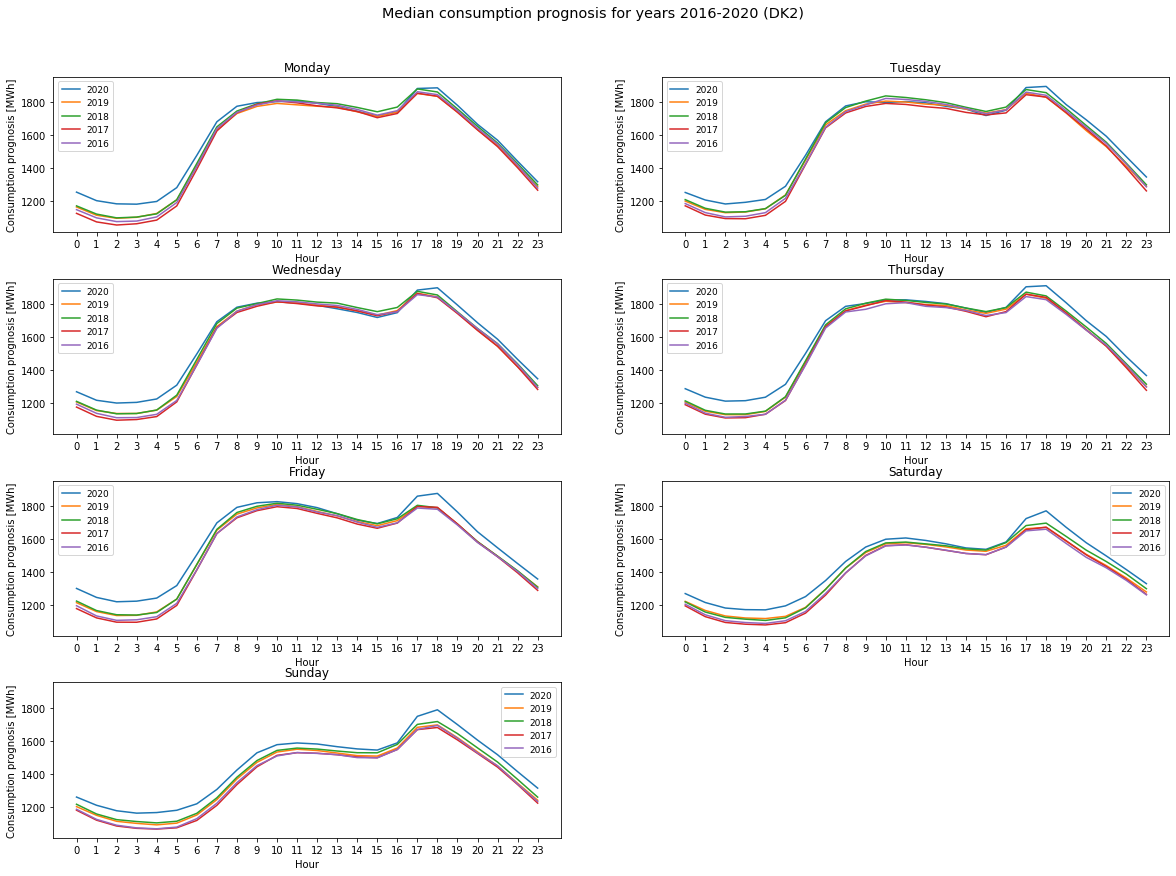

In [14]:
draw_7_plots_hour_for_year(data_median_by_year_per_dayofweek, str_week_list, ylabel, title['median_per_dayofweek'])
savePlot('median_dayofweek')

In [15]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear              
2016 1          34131.000000
     2          35846.000000
     3          36590.666667
     4          38307.750000
     5          39491.000000
...                      ...
2020 129        32939.714286
     130        32847.357143
     131        32778.428571
     132        32779.142857
     133        32862.642857

[1594 rows x 1 columns]

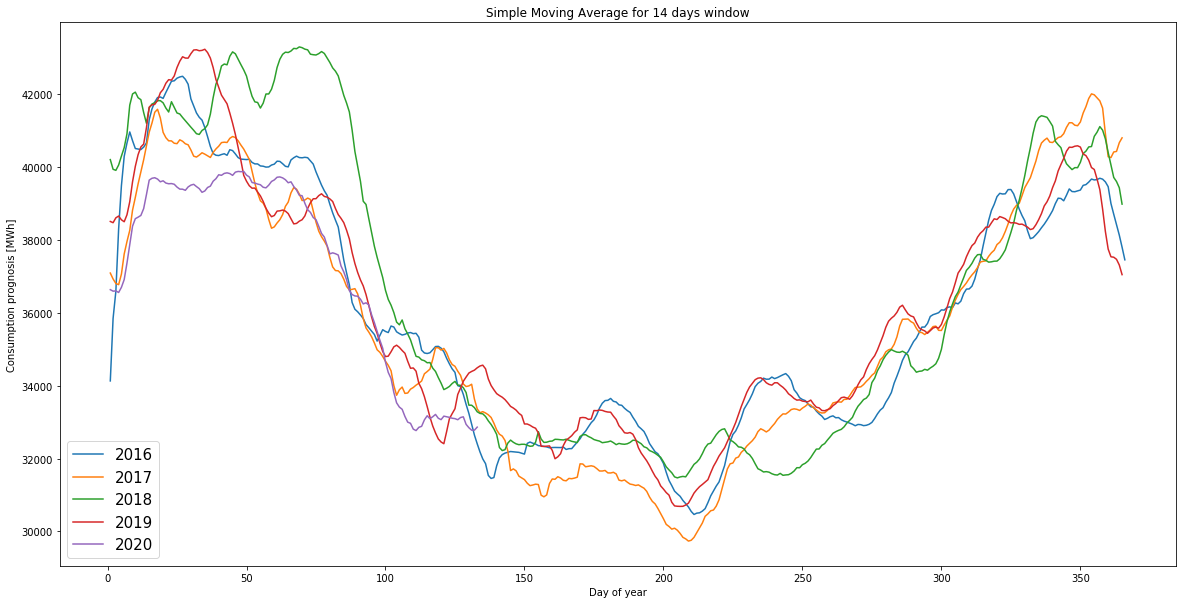

In [16]:
draw_plot_dayofyear(data_total_per_day_of_year, 'Simple Moving Average for 14 days window',ylabel)
savePlot('sma_14days')

In [17]:
data_total_per_day_of_year = data.copy()
df = data_total_per_day_of_year
df = df.drop(columns=['holiday','date','dayofweek'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['year','dayofyear']).stack().reset_index().rename(columns={"level_2": "hour"})
df = df.groupby(['year','dayofyear']).sum()
df['sma'] = df.rolling(14,min_periods=1).mean()
df = df.drop(columns=[0])
data_total_per_day_of_year = df
data_total_per_day_of_year

sma
year dayofyear              
2016 1          34131.000000
     2          35846.000000
     3          36590.666667
     4          38307.750000
     5          39491.000000
...                      ...
2020 129        32939.714286
     130        32847.357143
     131        32778.428571
     132        32779.142857
     133        32862.642857

[1594 rows x 1 columns]

In [18]:
data_per_year = data.copy()
df = data_per_year
df = df.drop(columns=['holiday','date','dayofweek','dayofyear'])
df = df.set_index(['year']).stack().reset_index().rename(columns={"level_1": "hour"})
df = df.groupby(['year']).sum()
df.iloc[:,0] = df.iloc[:,0] / 1000000
df = df.iloc[:-1,:]
data_per_year = df
data_per_year

,0
year,
2016,13.135577
2017,13.030250
2018,13.286834
2019,13.164181


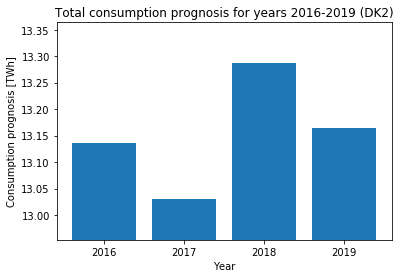

In [19]:
draw_simple_barplot_for_years(data_per_year,title['total_consumption_2016_2019'], ylabel = ylabelTWh)
savePlot('total_year')

In [20]:
data_one_year = data.copy()
df = data_one_year
df['day'] = df['date'].dt.strftime('%m-%d')
df = df[df.year == 2019]
# df = df.set_index(['day'])
df = df.drop(columns=['date','year','holiday','dayofweek','dayofyear'])
# df.pivot(index=df.index,columns=['year','dayofyear'])
# df = df.melt('Date', var_name='X', value_name='Val')
df = df.set_index(['day']).stack().reset_index()
df = df.groupby(['day']).sum()
data_one_year = df

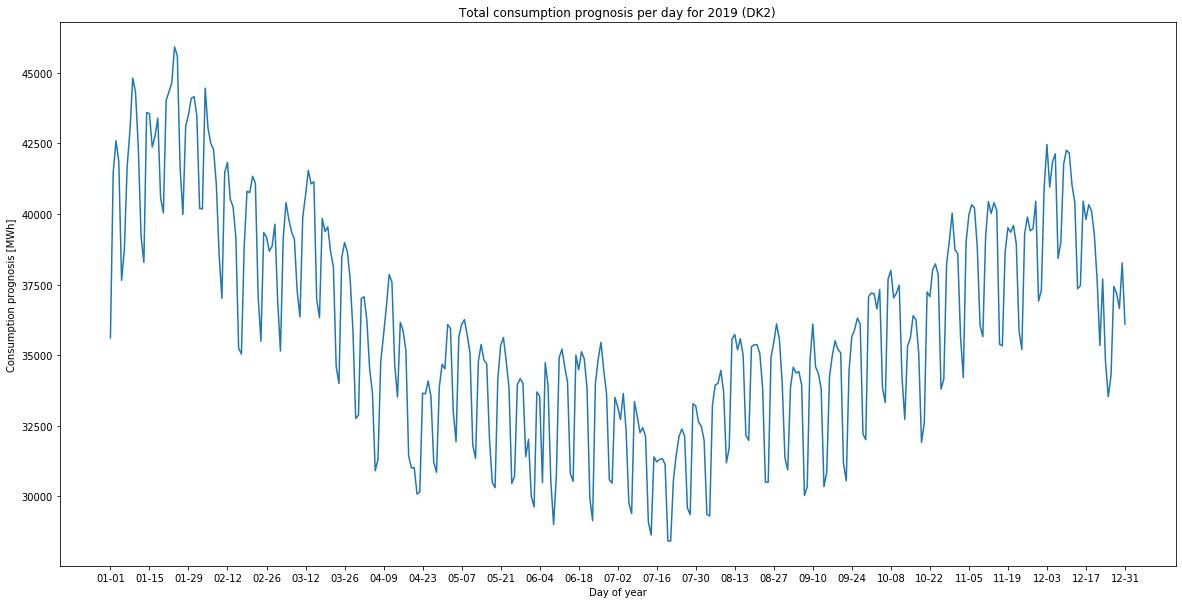

In [21]:
draw_plot_single_dayofyear(data_one_year, title['total_consumption_2019'])
savePlot('total_day_2019')